In [ ]:
from numpy import inf,random,pi,sin,cos
from itertools import permutations
from matplotlib import pyplot as plt

In [ ]:
n = 5
#C = [[random.choice([1,2,3,4,5]) for _ in range(n)] for _ in range(n)]

C = [
    [1,3,5,7,9],
    [3,1,5,2,5],
    [5,5,1,9,1],
    [7,2,9,1,24],
    [9,5,1,24,1]
]

for i in range(n):
    C[i][i] = inf

C

[[inf, 3, 5, 7, 9],
 [3, inf, 5, 2, 5],
 [5, 5, inf, 9, 1],
 [7, 2, 9, inf, 24],
 [9, 5, 1, 24, inf]]

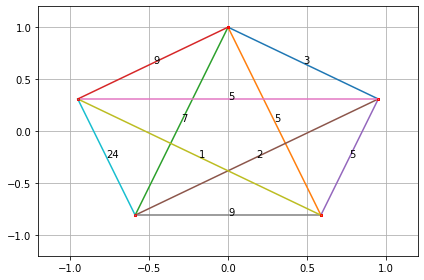

In [ ]:
def Polygon(sides, radius=1, rotation=0, translation=None):
    one_segment = pi * 2 / sides
    points = [
        (sin(one_segment * i + rotation) * radius,
         cos(one_segment * i + rotation) * radius)
        for i in range(sides)]
    if translation:
        points = [[sum(pair) for pair in zip(point, translation)]
                  for point in points]
    return points

x, y = [], []
for point in Polygon(n):
    px, py = point
    x.append(px)
    y.append(py)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid()
plt.rcParams["figure.autolayout"] = True
for i in range(n):
    for j in range(i, n):
        if C[i][j] != inf:
            plt.plot([x[i], x[j]], [y[i], y[j]], marker="o", markersize=2, markeredgecolor="red")
            plt.text((x[i]+x[j])/2, (y[i]+y[j])/2, f'{C[i][j]}')
plt.show()

In [ ]:
# Алгоритм полного перебора

def BruteTSM(C,start=0):
  nodes = [i for i in range(n)]
  nodes.pop(start)
  roads =  [''.join(permutation) for permutation in permutations(''.join(str(node) for node in nodes))]
  road_lengths = {}

  for road in roads:
    road_length = 0
    from_node = start
    for to_node in road:
      road_length += C[int(from_node)][int(to_node)]
      from_node = to_node
    road_length += C[int(to_node)][int(start)]
    road_lengths[str(start)+road] = road_length
  for k,v in road_lengths.items():
    if v == min(road_lengths.values()):
      return k,road_lengths[k]

BruteTSM(C)

('02413', 20)

In [ ]:
# Алгоритм ближайшего соседа

def NearestNeighbour(C):
  roads = []
  for start in range(n):
    trvld = [start,]
    road = 0

    current = start
    while len(trvld) != n:
        mn = inf
        nearest = inf
        
        for i in range(n):
            if i not in trvld:
                if C[current][i] < mn: 
                    mn = C[current][i]
                    nearest = i
        
        road += C[current][nearest]
        trvld.append(nearest)
        current = nearest

    road += C[current][start]
    roads.append((''.join(str(node) for node in trvld),road))
  return min(roads,key=lambda x: x[1])

NearestNeighbour(C)

('13024', 20)

In [ ]:
# Муравьиный алгоритм

#     No ant colony optimization?
#⠀ ⣞⢽⢪⢣⢣⢣⢫⡺⡵⣝⡮⣗⢷⢽⢽⢽⣮⡷⡽⣜⣜⢮⢺⣜⢷⢽⢝⡽⣝
#⠀⣞⢽⢪⢣⢣⢣⢫⡺⡵⣝⡮⣗⢷⢽⢽⢽⣮⡷⡽⣜⣜⢮⢺⣜⢷⢽⢝⡽⣝
#⠸⡸⠜⠕⠕⠁⢁⢇⢏⢽⢺⣪⡳⡝⣎⣏⢯⢞⡿⣟⣷⣳⢯⡷⣽⢽⢯⣳⣫⠇
#⠀⠀⢀⢀⢄⢬⢪⡪⡎⣆⡈⠚⠜⠕⠇⠗⠝⢕⢯⢫⣞⣯⣿⣻⡽⣏⢗⣗⠏⠀
#⠀⠪⡪⡪⣪⢪⢺⢸⢢⢓⢆⢤⢀⠀⠀⠀⠀⠈⢊⢞⡾⣿⡯⣏⢮⠷⠁⠀⠀
#⠀⠀⠀⠈⠊⠆⡃⠕⢕⢇⢇⢇⢇⢇⢏⢎⢎⢆⢄⠀⢑⣽⣿⢝⠲⠉⠀⠀⠀⠀
#⠀⠀⠀⠀⠀⡿⠂⠠⠀⡇⢇⠕⢈⣀⠀⠁⠡⠣⡣⡫⣂⣿⠯⢪⠰⠂⠀⠀⠀⠀
#⠀⠀⠀⠀⡦⡙⡂⢀⢤⢣⠣⡈⣾⡃⠠⠄⠀⡄⢱⣌⣶⢏⢊⠂⠀⠀⠀⠀⠀⠀
#⠀⠀⠀⠀⢝⡲⣜⡮⡏⢎⢌⢂⠙⠢⠐⢀⢘⢵⣽⣿⡿⠁⠁⠀⠀⠀⠀⠀⠀⠀
#⠀⠀⠀⠀⠨⣺⡺⡕⡕⡱⡑⡆⡕⡅⡕⡜⡼⢽⡻⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
#⠀⠀⠀⠀⣼⣳⣫⣾⣵⣗⡵⡱⡡⢣⢑⢕⢜⢕⡝⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
#⠀⠀⠀⣴⣿⣾⣿⣿⣿⡿⡽⡑⢌⠪⡢⡣⣣⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
#⠀⠀⠀⡟⡾⣿⢿⢿⢵⣽⣾⣼⣘⢸⢸⣞⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
#⠀⠀⠀⠀⠁⠇⠡⠩⡫⢿⣝⡻⡮⣒⢽⠋⠀⠀
#      ⢣⢫⡺⡵⣝⡮⣗⢷⠋⠀
#      ⢫⡺⡵⣝⡮⢷⠋⠀


def AntAlgorithm(C,a,b,base_ph,LOOPS,Q,airing_coefficient):
  full_paths = {}
  all_nodes = {i for i in range(n)}
  pheromones = [[base_ph for _ in range(n)] for _ in range(n)]
  for i in range(n):
    pheromones[i][i] = 0

  for k in range(LOOPS):
    delta_pheromones = [[0 for _ in range(n)] for _ in range(n)]

    for starting_node in all_nodes:
      trvld = str(starting_node)
      trvld_set = {int(node) for node in trvld}
      path_length = 0

      i = starting_node
      for _ in range(n-1):
        remaining_nodes = all_nodes-trvld_set
        weights = [C[i][j]**(-a) * pheromones[i][j]**b  if j in remaining_nodes else 0 for j in all_nodes]
        weights_sum = sum(weights)
        route_probabilities = {j:(weights[j]/weights_sum if j in remaining_nodes else 0) for j in all_nodes} 

        CHOOSE = random.random_sample()
        j = -1
        while CHOOSE > 0:
          j += 1
          CHOOSE -= route_probabilities[j]
        
        trvld += str(j)
        trvld_set = {int(node) for node in trvld}
        path_length += C[i][j]
        i = j

      full_paths[trvld] = path_length + C[int(trvld[-1])][int(trvld[0])]
      for i in range(n-1):
        delta_pheromones[int(trvld[i])][int(trvld[i+1])] += Q/path_length
      pheromones = [[(1-airing_coefficient)*pheromones[i][j] + delta_pheromones[i][j] for i in range(n)] for j in range(n)]
    return min(full_paths.items(),key=lambda x: x[1])


a = 10
b = 1
base_ph = 0.2
LOOPS = 1000
Q = 10
airing_coefficient = 0.2
AntAlgorithm(C,a,b,base_ph,LOOPS,Q,airing_coefficient)

('13024', 20)

In [ ]:
# Алгоритм динамического программирования

def DPAlgorithm(C,start=0):
  def findCheapest(i, mask):
    if dp[i][mask] != inf:
      return dp[i][mask]
    for j in range(n):
      if C[i][j] != 0 and ((mask >> j) & 1 == 1):
        dp[i][mask] = min(dp[i][mask], findCheapest(j, mask - 2**j) + C[i][j])
    return dp[i][mask]

  def findWay(i,mask,best):
    way = [i,]

    while mask != 0:
      for j in range(n):
        if C[i][j] != 0 and ((mask >> j) & 1 == 1) and (dp[i][mask] == dp[j][mask - 2**j] + C[i][j]): 
          way.append(j)
          i = j
          mask -= 2**j
          continue
    return "".join(str(way[i]) for i in range(n)),best
  dp = [[inf] * (2**n) for i in range(n)]
  dp[0][0] = 0
  mask = 2**n - 1
  return findWay(start,mask,findCheapest(start,mask))

DPAlgorithm(C)

('02413', 20)